In [ ]:
# importing the modules to work with
import kagglehub # kaggle module to download
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split # splitting method
from sklearn.metrics import mean_squared_error, r2_score # mean squared error metric
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # also for data visualization
import pandas as pd # for data manipulation

# importing the dataset from the kaggle
path = kagglehub.dataset_download("lainguyn123/student-performance-factors")

# Creating a dataframe
df = pd.read_csv(path + "/StudentPerformanceFactors.csv")

100%|██████████| 93.9k/93.9k [00:00<00:00, 49.3MB/s]

Extracting files...


In [ ]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


The expression df.isnull().sum() is used in Python with the pandas library to check for missing values (NaNs) in a DataFrame (df).

Here’s a breakdown of what it does:

df.isnull() creates a DataFrame of the same shape as df, where each element is True if the corresponding value is NaN (Not a Number, representing missing or undefined data) and False otherwise.
.sum() then counts the number of True values (i.e., the missing values) for each column in the DataFrame.

In [ ]:
df.isnull().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


In [ ]:
df.shape

(6607, 20)

In [ ]:
df.dropna(axis=0 , inplace=True) # to drop rows that contain empty values
# axis=1 specifies that columns should be dropped, not rows. If you set axis=0, it would drop rows instead.
df.isnull().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


In [ ]:
df.drop_duplicates(inplace=True) # dropping duplicated data
df.shape

(6378, 20)

In [ ]:
# drop Peer_Influence, Family_Income
df.drop(['Peer_Influence', 'Family_Income', 'Previous_Scores', 'Extracurricular_Activities', 'Physical_Activity', 'Parental_Education_Level'], axis=1, inplace=True)

In [ ]:
# selecting 'object' (categorical) data types and converting it numerical data
for column in df.select_dtypes(include=['object']).columns:
    unique_values = df[column].unique() # getting all the unique values from the column
    mapping = {value: i for i, value in enumerate(unique_values)} # converting the category into an enumeration and then returning the value
    df[column] = df[column].map(mapping) # remapping the data

In [ ]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Sleep_Hours,Motivation_Level,Internet_Access,Tutoring_Sessions,Teacher_Quality,School_Type,Learning_Disabilities,Distance_from_Home,Gender,Exam_Score
0,23,84,0,0,7,0,0,0,0,0,0,0,0,67
1,19,64,0,1,8,0,0,2,0,0,0,1,1,61
2,24,98,1,1,7,1,0,2,0,0,0,0,0,74
3,29,89,0,1,8,1,0,1,0,0,0,1,0,71
4,19,92,1,1,6,1,0,3,1,0,0,0,1,70


In [ ]:
# if we get the data types of all columns now we can see that its all int64
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6378 entries, 0 to 6606
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Hours_Studied          6378 non-null   int64
 1   Attendance             6378 non-null   int64
 2   Parental_Involvement   6378 non-null   int64
 3   Access_to_Resources    6378 non-null   int64
 4   Sleep_Hours            6378 non-null   int64
 5   Motivation_Level       6378 non-null   int64
 6   Internet_Access        6378 non-null   int64
 7   Tutoring_Sessions      6378 non-null   int64
 8   Teacher_Quality        6378 non-null   int64
 9   School_Type            6378 non-null   int64
 10  Learning_Disabilities  6378 non-null   int64
 11  Distance_from_Home     6378 non-null   int64
 12  Gender                 6378 non-null   int64
 13  Exam_Score             6378 non-null   int64
dtypes: int64(14)
memory usage: 747.4 KB


In [ ]:
df.describe()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Sleep_Hours,Motivation_Level,Internet_Access,Tutoring_Sessions,Teacher_Quality,School_Type,Learning_Disabilities,Distance_from_Home,Gender,Exam_Score
count,6378.000000,6378.000000,6378.00000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000
mean,19.977109,80.020853,1.08545,0.901850,7.034964,0.907965,0.076043,1.495296,0.501568,0.304798,0.104735,0.503763,0.421762,67.252117
std,5.985460,11.550723,0.69502,0.698635,1.468033,0.695758,0.265087,1.233984,0.673018,0.460358,0.306236,0.670442,0.493880,3.914217
min,1.000000,60.000000,0.00000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,1.00000,0.000000,6.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,65.000000
50%,20.000000,80.000000,1.00000,1.000000,7.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.000000
75%,24.000000,90.000000,2.00000,1.000000,8.000000,1.000000,0.000000,2.000000,1.000000,1.000000,0.000000,1.000000,1.000000,69.000000
max,44.000000,100.000000,2.00000,2.000000,10.000000,2.000000,1.000000,8.000000,2.000000,1.000000,1.000000,2.000000,1.000000,101.000000


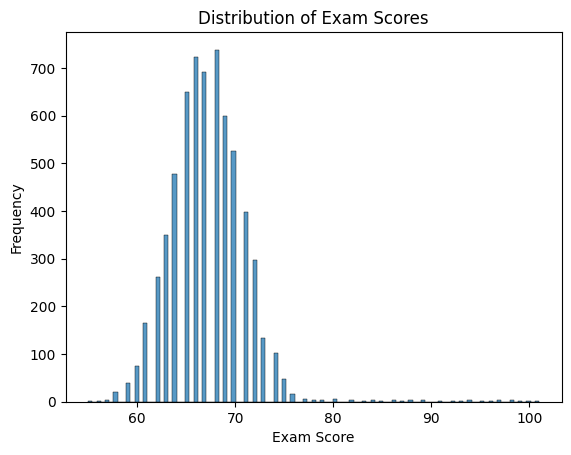

In [ ]:
sns.histplot(data=df, x='Exam_Score')
plt.title('Distribution of Exam Scores')
plt.xlabel('Exam Score')
plt.ylabel('Frequency')
plt.show()

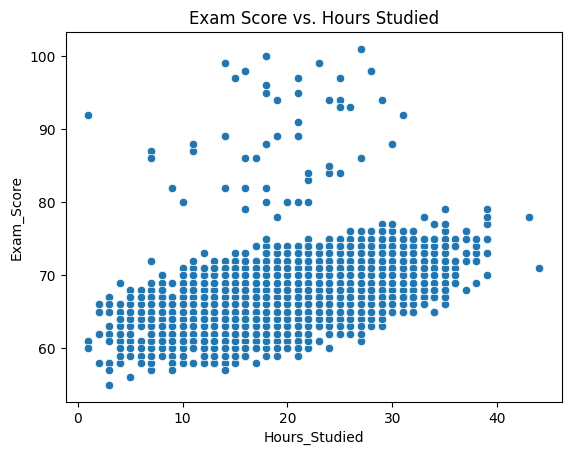

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(data=df, x='Hours_Studied', y='Exam_Score')
plt.title('Exam Score vs. Hours Studied')
plt.show()

In [ ]:
import numpy as np
z = np.abs((df - df.mean()) / df.std())
threshold = 3
df_no_outliers = df[(z < threshold).all(axis=1)]
X = df_no_outliers.drop('Exam_Score', axis=1)
y = df_no_outliers['Exam_Score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)
lr_score = linear_regression.score(X_test, y_test)
print("Linear Regression Score:", lr_score)

Linear Regression Score: 0.883655358310361


In [ ]:
linear_regression.feature_names_in_

array(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Sleep_Hours', 'Motivation_Level',
       'Internet_Access', 'Tutoring_Sessions', 'Teacher_Quality',
       'School_Type', 'Learning_Disabilities', 'Distance_from_Home',
       'Gender'], dtype=object)

In [ ]:
# exporting the model
import joblib
joblib.dump(linear_regression, 'student_linear_regression_score_predict.pkl')

['student_linear_regression_score_predict.pkl']

In [ ]:
!pip install xgboost==1.7.5

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.3/200.3 MB 4.1 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 2.1.2
    Uninstalling xgboost-2.1.2:
      Successfully uninstalled xgboost-2.1.2


In [ ]:
import xgboost as xgb
xgb_regressor = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_regressor.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
rfscore = rf_regressor.score(X_test, y_test)
print("Random Forest Score:", rfscore)

Random Forest Score: 0.8487259571524033
